In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import time
import seaborn as sns
from scipy import signal
from scipy import integrate
#sns.set_theme()

Linear error:  0.012770021828519251
Cubic error:  0.00021906362737552482
Nearest error:  0.0753440873738314


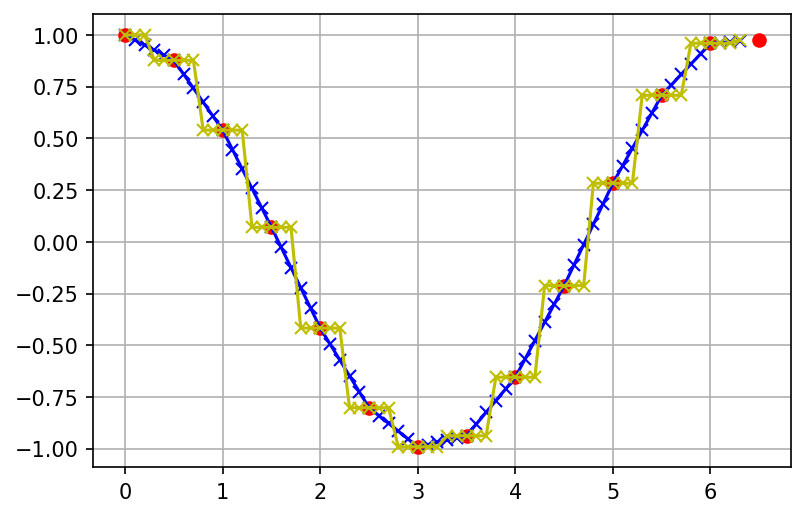

In [2]:
start = 0
stop = 2*np.pi
step = 0.5

x = np.arange(start, stop + step, step) #wygenerowanie zakresu zmiennej x
y = np.cos(x) #defniowanie funkcji y

y_interp_linear = interp.interp1d(x, y, kind='linear') #zdefiniowanie funkcji do interpolacji liniowej
y_interp_cubic = interp.interp1d(x, y, kind='cubic') #zdefiniowanie funkcji do interpolacji kubicznej
y_interp_nearest = interp.interp1d(x, y, kind='nearest') #zdefiniowanie funkcji do interpolacji najblizszego sasiada

divider = 5 #definiowanie rozstawu
x_dense = np.arange(start, stop + step/divider, step/divider) #wygenerowanie nowego zakresu zmiennej x
y_linear = y_interp_linear(x_dense) #obliczenie nowych y z interpolacji liniowej
y_cubic = y_interp_cubic(x_dense) #obliczenie nowych y z interpolacji kubicznej
y_nearest = y_interp_nearest(x_dense) #obliczenie nowych y z interpolacji najblizszego sasiada
y_ideal = np.cos(x_dense) #obliczenie nowych wartosci y idealnych


plt.figure(dpi=150) #przedstawienie wykresów
plt.plot(x, y, "ro") #wykres funkcji y
#plt.plot(x, y_interp_linear(x)) #wykres interpolacji punktów x
plt.plot(x_dense, y_linear, "b-x") #wykres interpolacji liniowej x_dense
#plt.plot(x_dense, y_cubic, "g-x") #wykres interpolacji kubicznej x_dense
plt.plot(x_dense, y_nearest, "y-x") #wykres interpolacji najblizszego saisada x_dense
#plt.plot(x_dense, y_ideal, "m-x") #wykres idealnych wartosci y dla x_dense
plt.grid(True)
#plt.xlim([start, stop])

def mse(x1, x2): #funkcja do liczenia błedu średnio kwadratowego
    return np.mean(np.sqrt((x1-x2)**2)) #zwrócenie wartosci błedu

print("Linear error: ", mse(y_ideal, y_linear))
print("Cubic error: ", mse(y_ideal, y_cubic))
print("Nearest error: ", mse(y_ideal, y_nearest))

#metoda kubiczna ma najmniejszy bład, najblizszego sasiada ma najwiekszy, ta metoda ma sens kiedy
#wartosci y przujmuja konretne wartosci, nie wartosci miedzy tymi znanymi
#interpolacja danych binarnych - sasiada sie sprawdza

# Rzad interpolacji :      Rodzaj:
#        0                 sasiada
#        1                 liniowa
#        2                kwadratowa
#        3                 kubiczna

Linear error:  569.2074870569559
Cubic error:  9.146723488814745
Nearest error:  2156.987654321012
RBF error:  138.86055914975938


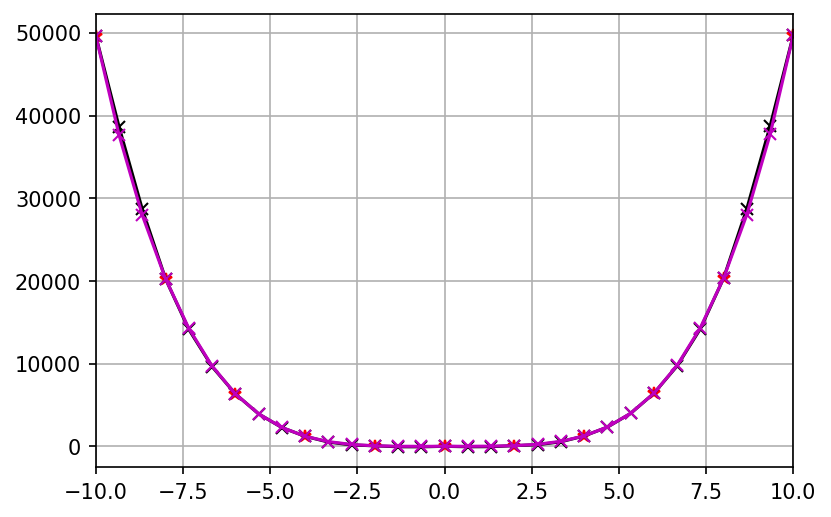

In [27]:
start = -10
stop = 10
step = 2

x = np.arange(start, stop + step, step) #wygenerowanie zakresu zmiennej x
y = 5*x**4 - 3*x**2 + 5*x - 4  #definowanie funkcji y (wielomian)

y_interp_linear = interp.interp1d(x, y, kind='linear') #zdefiniowanie funkcji do interpolacji liniowej
y_interp_cubic = interp.interp1d(x, y, kind='cubic') #zdefiniowanie funkcji do interpolacji kubicznej
y_interp_nearest = interp.interp1d(x, y, kind='nearest') #zdefiniowanie funkcji do interpolacji najblizszego sasiada
y_interp_rbf = interp.Rbf(x, y, function='thin-plate') #zdefiniowanie funkcji do interpolacji rbf

#rbf - radialne funkjce bazowe

divider = 3  #zdefiniowanie rozstawu 
x_dense = np.arange(start, stop + step/divider, step/divider) #wygenerowanie nowego zakresu zmiennej x
y_linear = y_interp_linear(x_dense) #obliczenie nowych y z interpolacji liniowej
y_cubic = y_interp_cubic(x_dense) #obliczenie nowych y z interpolacji kubicznej
y_nearest = y_interp_nearest(x_dense) #obliczenie nowych y z interpolacji najblizszego sasiada
y_rbf = y_interp_rbf(x_dense) #obliczenie nowych y z interpolacji rbf
y_ideal = 5*x_dense**4 - 3*x_dense**2 + 5*x_dense - 4 #obliczenie nowych wartosci y idealnych


plt.figure(dpi=150) #przedstawienie wykresow
plt.plot(x, y, "r*") #wykres funkcji y dla x
#plt.plot(x_dense, y_linear, "b-x") #wykres interpolacji linowej x_dense
#plt.plot(x_dense, y_cubic, "g-x") #wykres interpolacji kubicznej x_dense
#plt.plot(x_dense, y_nearest, "y-x") #wykres interpolacji sasiada x_dense
plt.plot(x_dense, y_rbf, "k-x") #wykres interpolacji rbf x_dense
plt.plot(x_dense, y_ideal, "m-x") #wykres idealnych wartosci y dla x_dense
plt.grid(True)
plt.xlim([start, stop]) #ograniczenie osi x do przedzialu


print("Linear error: ", mse(y_ideal, y_linear))
print("Cubic error: ", mse(y_ideal, y_cubic))
print("Nearest error: ", mse(y_ideal, y_nearest))
print("RBF error: ", mse(y_ideal, y_rbf))

#błędy są duze bo duzy stopien wielomianu

Linear error our:  0.012980131855923078
Nearest error our:  0.07717579698059465
Linear error:  0.012980131855923078
Nearest error:  0.07728166556355352

Elapsed time our linear:  0.0
Elapsed time our nearest:  0.0
Elapsed time linear:  0.0
Elapsed time nearest:  0.0


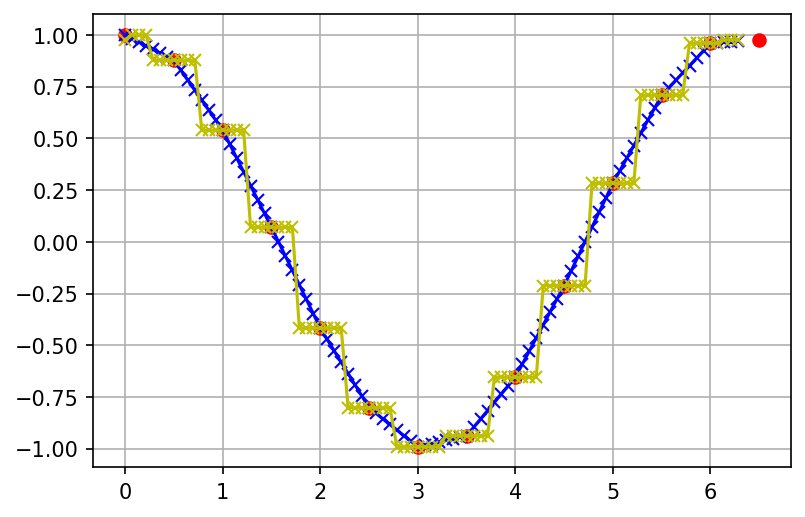

In [7]:
# ZADANIE 1
#Napisz funkcję do interpolacji 1-D zawierającą dwa tryby: liniowy i najbliższego sąsiada. 
#Nie używaj gotowych funkcji do interpolacji. Porównaj wyniki zaproponowanej funkcji z funkcjami wbudowanymi zarówno 
#w kontekście wyznaczanych wartości jak i czasu obliczeń.

start = 0
stop = 2*np.pi
step = 0.5

x = np.arange(start, stop + step, step) #wygenerowanie zakresu zmiennej x
y = np.cos(x) #zdefniowanie funkcji y

divider = 7
x_dense = np.arange(start, stop + step/divider, step/divider) #wygerenorwanie nowego zakresu zmiennej x_desne
y_ideal = np.cos(x_dense) #obliczenie wartosci idealnych y dla x_dense


def our_interpolate_1D(x, y, x_new, mode): #zdefiniowanie funkcji do interpolacji
    # mode - linear, nearest
    
    divider = int(len(x_dense)/len(x)) + 1 #obliczenie wielkosci rozstawu nowych danych
    inter = np.zeros(len(x_new)) #wygenerowanie tablicy zer
    
    if mode == "linear" : #dla metody liniowej
        
        for j in range(len(x_new)): #pętla do obliczenia nowych wartości dla nowego zakresu
            i = int(j / divider) #numer elementu za którym jest wartosc która chcemy polizyc
            inter[j] = y[i] + ( (y[i+1]-y[i])/(x[i+1]-x[i]) * (x_new[j]-x[i]) ) #algorytm liczenia kolejnych nowych wartosci
            
    if mode == "nearest": #dla metody sasiada
        
        for j in range(int(divider/2)+1, len(x_new)-divider, divider): #petla do liczenia wartości sasiednich
        
            i = int(j / divider) + 1 #algorytm do 
            
            for x in range(divider): #petla do przypisania wartosci sasiednich
                inter[j+x] = y[i]
                
        for d in range(0,(int(divider/2)+1)): #petla do definicji wartosci krawedziowych
            inter[d] = y[0] 
            inter[-d] = y[-1]

    return inter #zwrocenie nowych wartosci do interpolacji


y_our_linear = our_interpolate_1D(x, y, x_dense, "linear") #obliczenie interpolacji liniowej dla punktow x_dense 
y_our_nearest = our_interpolate_1D(x, y, x_dense, "nearest") #obliczenie interpolacji liniowej dla punktow x_dense 

y_interp_linear = interp.interp1d(x, y, kind='linear') #zdefiniowanie funkcji do interpolacji liniowej
y_interp_nearest = interp.interp1d(x, y, kind='nearest')

print("Linear error our: ", mse(y_ideal, y_our_linear)) #obliczenie błedu interpolacji
print("Nearest error our: ", mse(y_ideal, y_our_nearest))
print("Linear error: ", mse(y_ideal, y_interp_linear(x_dense)))
print("Nearest error: ", mse(y_ideal, y_interp_nearest(x_dense)))


b_t = time.time()
y_our_linear = our_interpolate_1D(x, y, x_dense, "linear")
e_t = time.time()
print("\nElapsed time our linear: ", e_t - b_t)

b_t = time.time()
y_our_nearest = our_interpolate_1D(x, y, x_dense, "nearest")
e_t = time.time()
print("Elapsed time our nearest: ", e_t - b_t)

b_t = time.time()
y_linear = y_interp_linear(x_dense)
e_t = time.time()
print("Elapsed time linear: ", e_t - b_t)

b_t = time.time()
y_nearest = y_interp_nearest(x_dense)
e_t = time.time()
print("Elapsed time nearest: ", e_t - b_t)


plt.figure(dpi=150) #przedstawienie wykresów
plt.plot(x,y, "ro" ) #wykres funkcji y
plt.plot(x_dense, our_interpolate_1D(x, y, x_dense, "linear"), "b-x" ) #wykres naszej interpolacji liniowej dla x_dense
plt.plot(x_dense, our_interpolate_1D(x, y, x_dense, "nearest"), "y-x" ) #wykres naszej interpolacji sasiada dla x_dense
plt.grid(True)
plt.show()

#Błedy bardzo zblizone do tych z funkcji wbudowanych, czas najdluzszy dla liniowej naszej, ale dla wbudowanych dla sasiada

In [19]:
start = -10
stop = 10
step = 0.00001

x = np.arange(start, stop + step, step) #wygenerowanie zakresu zmiennej x
y = 5*x**3 - 3*x**2 + 5*x - 4 #definicja funkcji y

b_t = time.time()
y_interp_linear = interp.interp1d(x, y, kind='linear', bounds_error=False)
e_t = time.time()
print("Elapsed time linear:", e_t - b_t)
b_t = time.time()
y_interp_cubic = interp.interp1d(x, y, kind='cubic', bounds_error=False)
e_t = time.time()
print("Elapsed time cubic:", e_t - b_t)
b_t = time.time()
y_interp_nearest = interp.interp1d(x, y, kind='nearest', bounds_error=False)
e_t = time.time()
print("Elapsed time nearest:", e_t - b_t, "\n")
# b_t = time.time()
# y_interp_rbf = interp.Rbf(x, y, function='thin-plate')
# e_t = time.time()
# print("Elapsed time:", e_t - b_t)

divider = 10
x_dense = np.arange(start, stop + step/divider, step/divider)

b_t = time.time()
y_linear = y_interp_linear(x_dense)
e_t = time.time()
print("Elapsed time linear:", e_t - b_t)

b_t = time.time()
y_cubic = y_interp_cubic(x_dense)
e_t = time.time()
print("Elapsed time cubic:", e_t - b_t)

b_t = time.time()
y_nearest = y_interp_nearest(x_dense)
e_t = time.time()
print("Elapsed time nearest:", e_t - b_t)

# b_t = time.time()
# y_rbf = y_interp_rbf(x_dense)
# e_t = time.time()
# print("Elapsed time:", e_t - b_t)

#Interpolacja kubiczna najdluzsza, sasiada dluzsza od liniowej

Elapsed time linear: 0.047043561935424805
Elapsed time cubic: 0.4373970031738281
Elapsed time nearest: 0.057051658630371094 

Elapsed time linear: 0.2692451477050781
Elapsed time cubic: 1.144040584564209
Elapsed time nearest: 0.9939022064208984


(0, 12.566370614359172)

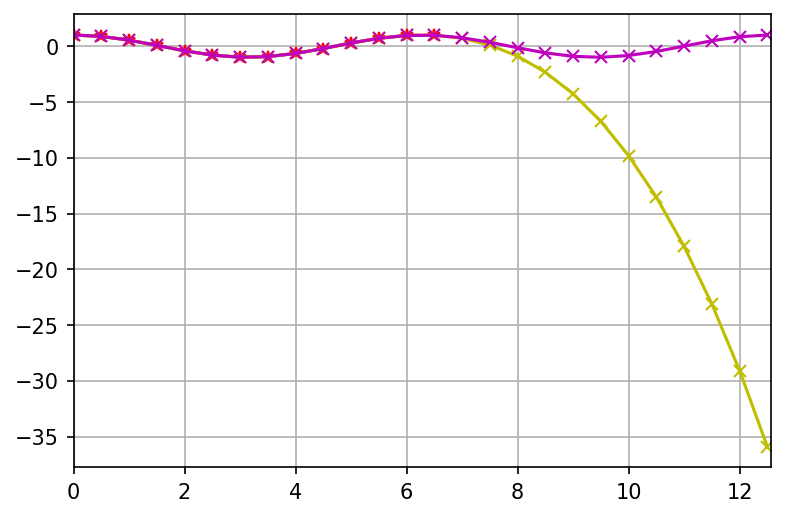

In [47]:
start = 0
stop = 2*np.pi
step = 0.5

x = np.arange(start, stop+step, step) #wygenerowanie zakresu zmiennej x
y = np.cos(x) #definicja funkcji y

y_interp_cubic = interp.interp1d(x, y, kind='cubic', fill_value="extrapolate") #interpolacja z ekstapolacją

x_dense = np.arange(start, 2*stop, step) #wygenerowanie nowego zakresu zmiennej x_dense, która wykarcza poza x
y_cubic = y_interp_cubic(x_dense) #obliczenie interpolacji kubicznej dla zmiennych x_dense
y_ideal = np.cos(x_dense) #idealne wartosci dla zmiennych x_dense

plt.figure(dpi = 150) #przedstawineie wykresów
plt.plot(x, y, "r-*") #wykres funkcji y dla zmiennej x
plt.plot(x_dense, y_cubic, "y-x") #wykres ekstrapolacji zmiennych x_dense
plt.plot(x_dense, y_ideal, "m-x") #wykres idealnych wartosci dla zmiennych x_dense
plt.grid(True)
plt.xlim([start, 2*stop]) #ograniczenie osi x do przedziału

#ekstrapolacja bierze wielomian z trzech ostatnich punktów, dla pierwszych ma to sens, ale dalej juz nie
#ekstapolacja najprostsza w tym przypadku nie działa
#najsensowniejsze metody predykcji to metody oparte o deep learning

Linear error:  0.004184987358946308
Cubic error:  4.376778484843337e-05
Nearest error:  0.05242943819484116


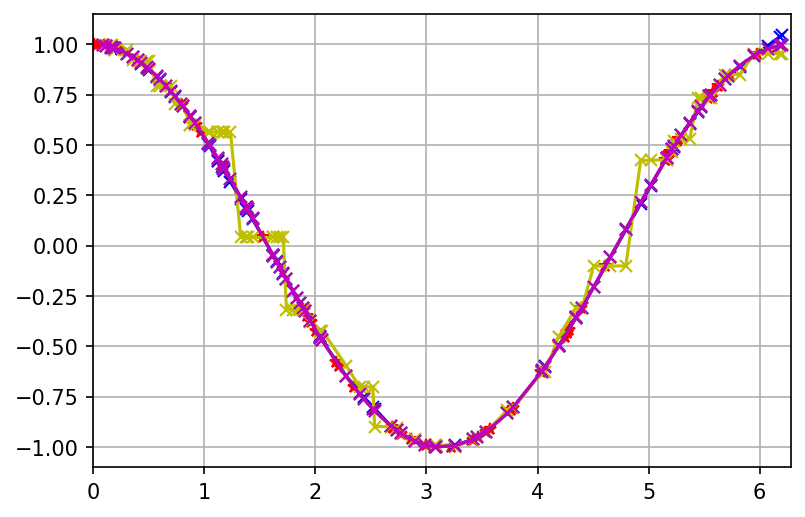

In [55]:
start = 0
stop = 2*np.pi
samples = 50

x = np.sort((np.random.rand(samples))*(stop-start)) #wygenerowanie zakresu zmiennych rozłożonych nierownomiernie (posortowanych)
y = np.cos(x) #definicja funkcji y

y_interp_linear = interp.interp1d(x, y, kind='linear', fill_value='extrapolate') #interpolacja liniowa z ekstrapolacja
y_interp_cubic = interp.interp1d(x, y, kind='cubic', fill_value='extrapolate') #interpolacja kubiczna z ekstrapolacja
y_interp_nearest = interp.interp1d(x, y, kind='nearest', fill_value='extrapolate') #interpolacja sasiada z ekstrapolacja

multiplier = 2 #mnoznik
x_dense = np.sort((np.random.rand(multiplier*samples))*(stop-start))#wygenerowanie nowego zakresu x_dense 
y_linear = y_interp_linear(x_dense) #obliczanie interpolacji liniowej dla x_dense
y_cubic = y_interp_cubic(x_dense) #obliczanie interpolacji kubicznej dla x_dense
y_nearest = y_interp_nearest(x_dense) #obliczanie interpolacji sasiada dla x_dense
y_ideal = np.cos(x_dense)

plt.figure(dpi=150)  #przedstawienie wykresów
plt.plot(x, y, "r*") #wykres funkcji y dla x
plt.plot(x_dense, y_linear, "b-x") #wykres interpolacji linowej x_dense
plt.plot(x_dense, y_cubic, "g-x") #wykres interpolacji kubicznej x_dense
plt.plot(x_dense, y_nearest, "y-x") #wykres ibterpolacji sasiada x_dense
plt.plot(x_dense, y_ideal, "m-x") #wykres idealnych wartosci dla x_dense
plt.grid(True)
plt.xlim([start, stop])

def mse(x1, x2): #funkcja do liczenia błedu średnio-kwadratowego
    return np.mean(np.sqrt((x1-x2)**2)) #zwracanie wartosci bledu

print("Linear error: ", mse(y_ideal, y_linear))
print("Cubic error: ", mse(y_ideal, y_cubic))
print("Nearest error: ", mse(y_ideal, y_nearest))

#najmniejszy jest blad interpolacji kubicznej

(0, 6.283185307179586)

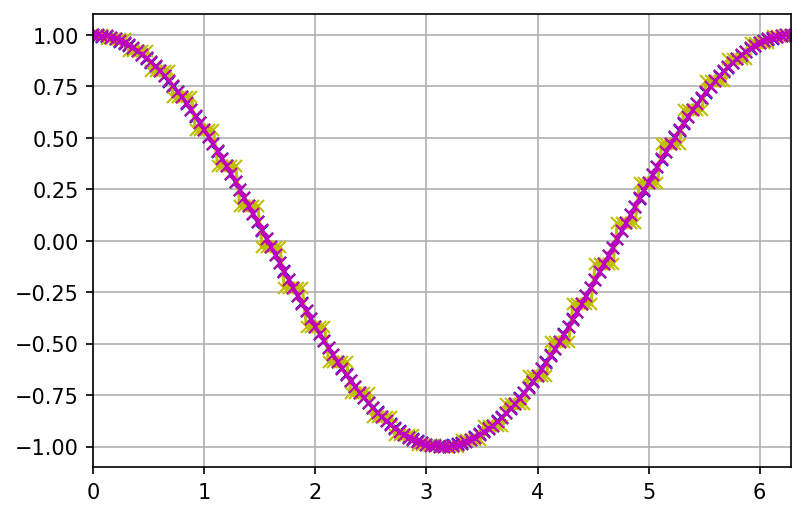

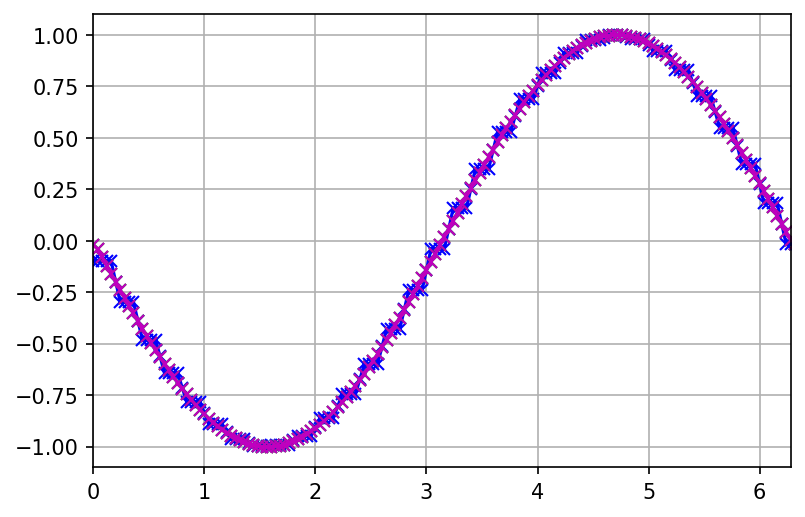

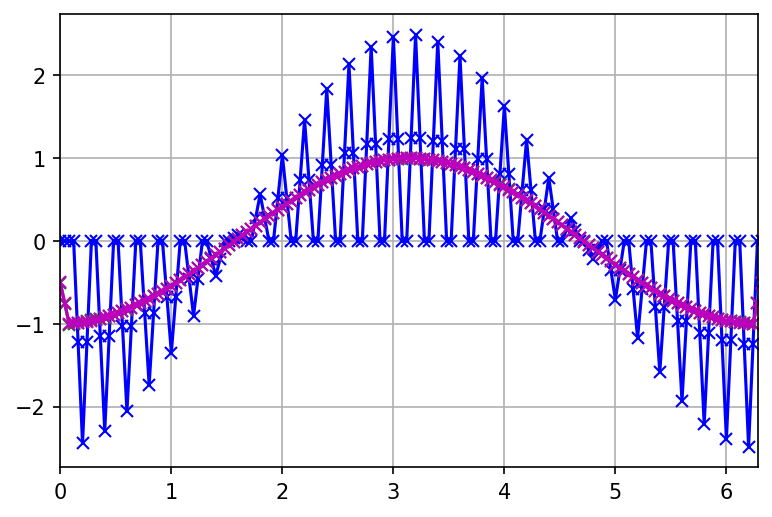

In [107]:
start = 0
stop = 2*np.pi
step = 0.2

x = np.arange(start, stop + step, step) #wygenerowanie zakresu zmiennej x
y = np.cos(x) #definicja funkcji y

y_interp_linear = interp.interp1d(x, y, kind='linear') #zdefiniowanie funkcji do interpolacji liniowej
y_interp_cubic = interp.interp1d(x, y, kind='cubic') #zdefiniowanie funkcji do interpolacji kubicznej
y_interp_nearest = interp.interp1d(x, y, kind='nearest') #zdefiniowanie funkcji do interpolacji najblizszego sasiada

divider = 5  #definiowanie rozstawu
x_dense = np.arange(start, stop + step/divider, step/divider) #wygenerowanie nowego zakresu zmiennej x
y_linear = y_interp_linear(x_dense) #obliczenie nowych y z interpolacji liniowej
y_cubic = y_interp_cubic(x_dense) #obliczenie nowych y z interpolacji kubicznej
y_nearest = y_interp_nearest(x_dense) #obliczenie nowych y z interpolacji najblizszego sasiada
y_ideal = np.cos(x_dense) #obliczenie nowych wartosci y idealnych

y_linear_gradient = np.gradient(y_linear, step/divider) #obliczanie pochodnej interpolacji liniowej
y_cubic_gradient = np.gradient(y_cubic, step/divider) #obliczanie pochodnej interpolacji kubicznej
y_nearest_gradient = np.gradient(y_nearest, step/divider) #obliczanie pochodnej interpolacji sasiada
y_ideal_gradient = np.gradient(y_ideal, step/divider) #obliczanie idealnej pochodnej 

y_linear_gradient_gradient = np.gradient(y_linear_gradient, step/divider) #obliczanie 2 pochodnej interpolacji liniowej
y_cubic_gradient_gradient = np.gradient(y_cubic_gradient, step/divider) #obliczanie 2 pochodnej interpolacji kubicznej
y_nearest_gradient_gradient = np.gradient(y_nearest_gradient, step/divider) #obliczanie 2 pochodnej interpolacji sasiada
y_ideal_gradient_gradient = np.gradient(y_ideal_gradient, step/divider) #obliczanie 2 idealnej pochodnej 

plt.figure(dpi=150) #przedstawienie wykresów
plt.plot(x, y, "r*") #wykres funkcji y na x
plt.plot(x_dense, y_linear, "b-x") #wykres interpolacji liniowej dla x_dense
plt.plot(x_dense, y_cubic, "g-x") #wykres interpolacji kubicznej dla x_dense
plt.plot(x_dense, y_nearest, "y-x") #wykres interpolacji sasiada dla x_dense
plt.plot(x_dense, y_ideal, "m-x") #wykres idealnych wartosci y dla x_dense
plt.grid(True)
plt.xlim([start, stop]) #ograniczenie osi x do przedziału

plt.figure(dpi=150)
plt.plot(x_dense, y_linear_gradient, "b-x") #wykres pochodnej interpolacji liniowej dla x_dense
plt.plot(x_dense, y_cubic_gradient, "g-x") #wykres pochodnej interpolacji kubicznej dla x_dense
# plt.plot(x_dense, y_nearest_gradient, "y-x") #wykres pochodnej interpolacji sasiada dla x_dense
plt.plot(x_dense, y_ideal_gradient, "m-x") #wykres pochodnej idealnej wartosci y na x_dense
plt.grid(True)
plt.xlim([start, stop]) #ograniczenie osi x do przedziału

#gradient dla interpolacji sasiada jest błędny, funkcja najblizszych sasiadow jest nierozniczkowalna

plt.figure(dpi=150)
plt.plot(x_dense, y_linear_gradient_gradient, "b-x") #wykres 2 pochodnej interpolacji liniowej dla x_dense
plt.plot(x_dense, y_cubic_gradient_gradient, "g-x") #wykres 2 pochodnej interpolacji kubicznej dla x_dense
# plt.plot(x_dense, y_nearest_gradient_gradient, "y-x") #wykres 2 pochodnej interpolacji sasiada dla x_dense
plt.plot(x_dense, y_ideal_gradient_gradient, "m-x") #wykres 2 pochodnej idealnej wartosci y na x_dense
plt.grid(True)
plt.xlim([start, stop]) #ograniczenie osi x do przedziału

#gradient 2 rzedu dla interpolacji liniowej jest błedny, 
#gradient 5 rzedu dla interpolacji kubicznej jest błędny

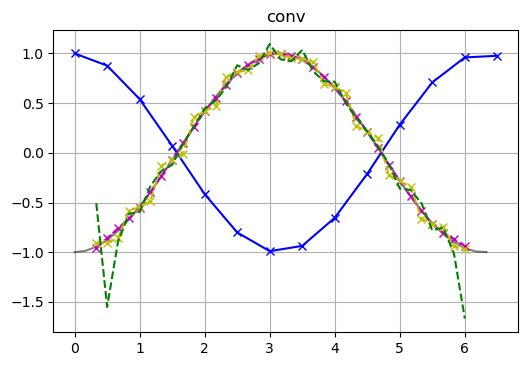

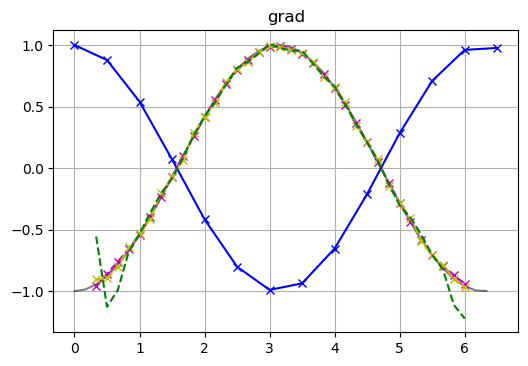

In [124]:
# ZADANIE 2
#Porównaj zachowanie drugiej pochodnej liczoną za pomocą konwolucji jak i podwójnego obliczenia pierwszej pochodnej
#(analogicznie do Laboratorium 2) danych po różnych typach interpolacji 
#(najbliższego sąsiada, liniowa, kwadratowa, kubiczna, wybranej radialnej funkcji bazowej). 
#Czy są widoczne różnice? Uzasadnij uzyskane rezultaty

start = 0
stop = 2*np.pi
step = 0.5

x = np.arange(start, stop + step, step) #wygenerowanie zakresu zmiennej x
y = np.cos(x) #definicja funkcji y


y_interp_linear = interp.interp1d(x, y, kind='linear') #zdefiniowanie funkcji do interpolacji liniowej
y_interp_cubic = interp.interp1d(x, y, kind='cubic') #zdefiniowanie funkcji do interpolacji kubicznej
y_interp_nearest = interp.interp1d(x, y, kind='nearest') #zdefiniowanie funkcji do interpolacji sasiada
y_interp_quadratic = interp.interp1d(x, y, kind='quadratic') #zdefiniowanie funkcji do interpolacji kwadratowej
y_interp_rbf = interp.Rbf(x, y, function='thin-plate') #zdefiniowanie funkcji do interpolacji rbf


divider = 3
x_dense = np.arange(start, stop + step/divider, step/divider) #wygenerowanie nowego zakresu x_dense

y_linear = y_interp_linear(x_dense) #obliczenie interpolacji liniowej dla x_dense
y_cubic = y_interp_cubic(x_dense) #obliczenie interpolacji kubicznej dla x_dense
y_nearest = y_interp_nearest(x_dense) #obliczenie interpolacji siasiada dla x_dense
y_quadratic = y_interp_quadratic(x_dense) #obliczenie interpolacji kwadratowej dla x_dense
y_rbf = y_interp_rbf(x_dense) #obliczenie interpolacji rbf dla x_dense


ddy_ideal = -np.cos(x_dense) #idealna pochodna 2 rzedu dla wartosci x_dense


dy_linear = np.gradient(y_linear, step/divider)
ddy_linear = np.gradient(dy_linear, step/divider) #pochodna 2 rzedu dla interpolacji liniowej

dy_cubic = np.gradient(y_cubic, step/divider)
ddy_cubic = np.gradient(dy_cubic, step/divider) #pochodna 2 rzedu dla interpolacji kubicznej

dy_nearest = np.gradient(y_nearest, step/divider)
ddy_nearest = np.gradient(dy_nearest, step/divider) #pochodna 2 rzedu dla interpolacji sasiada

dy_quadratic = np.gradient(y_quadratic, step/divider)
ddy_quadratic = np.gradient(dy_quadratic, step/divider) #pochodna 2 rzedu dla interpolacji kwadratowej

dy_rbf = np.gradient(y_rbf, step/divider)
ddy_rbf = np.gradient(dy_rbf, step/divider) #pochodna 2 rzedu dla interpolacji rbf


#liczenie pochodnych 2 rzedu metoda konowlucji dla roznych interpolacji
ddy_linear_conv = signal.convolve(y_linear, np.array([1, -1, 1]), mode='same') / ((step/divider)**2)
ddy_cubic_conv = signal.convolve(y_cubic, np.array([1, -2, 1]), mode='same') / ((step/divider)**2)
ddy_nearest_conv = signal.convolve(y_nearest, np.array([1, -2, 1]), mode='same') / ((step/divider)**2)
ddy_quadratic_conv = signal.convolve(y_quadratic, np.array([1, -2, 1]), mode='same') / ((step/divider)**2)
ddy_rbf_conv = signal.convolve(y_rbf, np.array([1, -2, 1]), mode='same') / ((step/divider)**2)



plt.figure(dpi=100) #przedstawienie wykresow dla podwojnego liczenia pochodnej
plt.title("conv")
plt.plot(x,y, "bx-") #wykres funkcji y dla x
plt.plot(x_dense, ddy_ideal, "k-", alpha=0.5) #wykres idealnej pochodnej 2 dla x_dense
#plt.plot(x_dense[2:-2], ddy_linear_conv[2:-2], 'c--') #wykres pochodnej 2 dla interpolacji linowej x_dense
plt.plot(x_dense[2:-2], ddy_cubic_conv[2:-2], 'mx--') #wykres pochodnej 2 dla interpolacji kubicznej x_dense
#plt.plot(x_dense[2:-2], ddy_nearest_conv[2:-2], 'r--') #wykres pochodnej 2 dla interpolacji sasiada x_dense
plt.plot(x_dense[2:-2], ddy_quadratic_conv[2:-2], 'yx--') #wykres pochodnej 2 dla interpolacji kwadratowej x_dense
plt.plot(x_dense[2:-2], ddy_rbf_conv[2:-2], 'g--') #wykres pochodnej 2 dla interpolacji rbf x_dense
plt.grid(True)
plt.show()


plt.figure(dpi=100) #przedstaweienie wykresow dla pochodnej metoda konwolucja
plt.title("grad")
plt.plot(x,y, "bx-") #wykres funkcji y dla x
plt.plot(x_dense, ddy_ideal, "k-", alpha=0.5) #wykres idealnej pochodnej 2 dla x_dense
#plt.plot(x_dense[2:-2], ddy_linear[2:-2], 'cx--') #wykres pochodnej 2 dla interpolacji linowej x_dense
plt.plot(x_dense[2:-2], ddy_cubic[2:-2], 'mx--') #wykres pochodnej 2 dla interpolacji kubicznej x_dense
#plt.plot(x_dense[2:-2], ddy_nearest[2:-2], 'r--') #wykres pochodnej 2 dla interpolacji sasiada x_dense
plt.plot(x_dense[2:-2], ddy_quadratic[2:-2], 'yx--') #wykres pochodnej 2 dla interpolacji kwadratowej x_dense
plt.plot(x_dense[2:-2], ddy_rbf[2:-2], 'g--') #wykres pochodnej 2 dla interpolacji rbf x_dense
plt.grid(True)
plt.show()

#rbf - radialna funkcja bazowa
#pochodna 2 rzedu dla interpoacji kwadratowej dziala znacznie lepiej dla konwolucji
#dla obu metod pochodna 2 rzedu interpolacji liniowej i sasiada nie dziala
#rbf srednio dziala, ale dla konwolucji jest lepszy

ZS size:  3844
ZS shape:  (62, 62)
ZS new shape:  (1256, 1256)


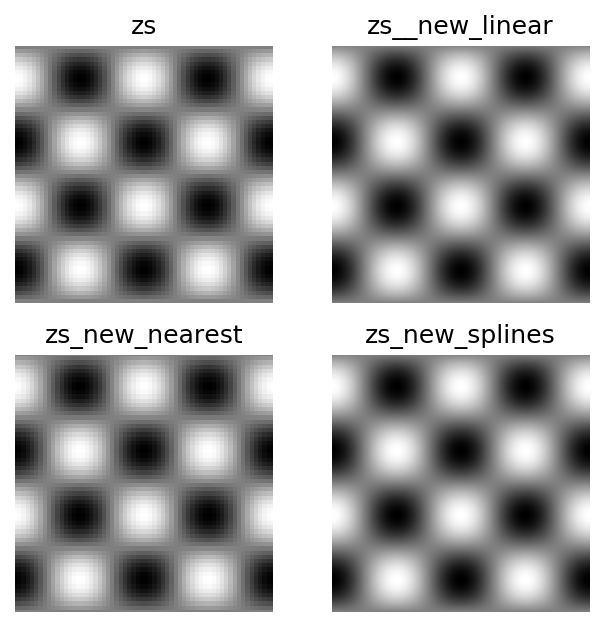

In [13]:
#interpolacja danych uporządkowanych, danych które są zdefiniowane na równomierrnej siatce,
#przy interpolacji danych 2D to ma fundamentalne znaczenie

start = -2*np.pi
end = 2*np.pi
step = 0.2
samples = int((stop - start) / step) #wygerenowanie licbzy próbek

x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej x
y = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej y

xs, ys = np.meshgrid(x, y) #wygenerowanie siatek na osiach x i y
zs = np.cos(xs)*np.sin(ys) #definiowanie funkcji 

print("ZS size: ", zs.size) #wypisanie rozmiaru tablicy zs
print("ZS shape: ", zs.shape) #wypisanie rksztaltu tablicy zs

step_new = 0.01 #nowy krok
samples_new = int((stop - start) / step_new) #nowa liczba próbek
x_new = np.linspace(start, stop, samples_new) #wygenrwoanie nowego zakresu zmiennej x_new
y_new = np.linspace(start, stop, samples_new) #wygenrwoanie nowego zakresu zmiennej y_new
xs_new, ys_new = np.meshgrid(x_new, y_new) #wygenrwoanie nowej siatki na osiacxh x_new i y_new

zs_new_linear = interp.interpn((x, y), zs, (ys_new, xs_new), method='linear') #interpolacja liniowa n-wymiarowa
zs_new_nearest = interp.interpn((x, y), zs, (ys_new, xs_new), method='nearest') #interpolacja siasiada n-wymiarowa
zs_new_splines = interp.interpn((x, y), zs, (ys_new, xs_new), method='splinef2d') #interpolacja splinowa n-wymiarowa

zs_gradient = np.gradient(zs)[0] #pochodna funkcji zs na xs i ys
zs_linear_gradient = np.gradient(zs_new_linear)[0] #pochodna interpolacji liniowej na xs_new i ys_new
zs_nearest_gradient = np.gradient(zs_new_nearest)[0] #pochodna interpolacji sasiada na xs_new i ys_new
zs_splines_gradient = np.gradient(zs_new_splines)[0] #pochodna interpolacji splinowej na xs_new i ys_new

zs_gradient_gradient = np.gradient(zs_gradient)[0] # 2 pochodna funkcji zs na xs i ys
zs_linear_gradient_gradient = np.gradient(zs_linear_gradient)[0] #2 pochodna interpolacji liniowej na xs_new i ys_new
zs_nearest_gradient_gradient = np.gradient(zs_nearest_gradient)[0] #2 pochodna interpolacji sasiada na xs_new i ys_new
zs_splines_gradient_gradient = np.gradient(zs_splines_gradient)[0] #2 pochodna interpolacji splinowej na xs_new i ys_new

print("ZS new shape: ", zs_new_linear.shape) #wypisanie ksztaltu tablicy interpolacji liniowej xs_new i ys_new

rows = 2
cols = 2

plt.figure(dpi=150, figsize=(5, 5)) #przedstawienie wykresów
plt.subplot(rows, cols, 1)
plt.imshow(zs, cmap='gray') #wykres funkcji zs na xs i ys
plt.title("zs")
plt.grid(False)
plt.axis('off')
plt.subplot(rows, cols, 2)
plt.imshow(zs_new_linear, cmap='gray') #wykres interpolacji liniowej na xs_new i ys_new
plt.title("zs__new_linear")
plt.grid(False)
plt.axis('off')
plt.subplot(rows, cols, 3)
plt.imshow(zs_new_nearest, cmap='gray') #wykres interpiolacji sasiada na xs_new i ys_new
plt.title("zs_new_nearest")
plt.grid(False)
plt.axis('off')
plt.subplot(rows, cols, 4)
plt.imshow(zs_new_splines, cmap='gray') #wykres interpiolacji splinowej na xs_new i ys_new
plt.title("zs_new_splines")
plt.grid(False)
plt.axis('off')
plt.show()

#plt.figure(dpi=150, figsize=(5, 5))
#plt.subplot(rows, cols, 1)
#plt.imshow(zs_gradient, cmap='gray')
#plt.title("zs_gradient")
#plt.grid(False)
#plt.axis('off')
#plt.subplot(rows, cols, 2)
#plt.imshow(zs_linear_gradient, cmap='gray')
#plt.title("zs_linear_gradient")
#plt.grid(False)
#plt.axis('off')
#plt.subplot(rows, cols, 3)
#plt.imshow(zs_nearest_gradient, cmap='gray')
#plt.title("zs_nearest_radient")
#plt.grid(False)
#plt.axis('off')
#plt.subplot(rows, cols, 4)
#plt.imshow(zs_splines_gradient, cmap='gray')
#plt.title("zs_splines_gradient")
#plt.grid(False)
#plt.axis('off')
#plt.show()

#plt.figure(dpi=150, figsize=(5, 5))
#plt.subplot(rows, cols, 1)
#plt.imshow(zs_gradient_gradient, cmap='gray')
#plt.title("zs_gradient_gradient")
#plt.grid(False)
#plt.axis('off')
#plt.subplot(rows, cols, 2)
#plt.imshow(zs_linear_gradient_gradient, cmap='gray')
#plt.title("zs_linear_gradient_gradient")
#plt.grid(False)
#plt.axis('off')
#plt.subplot(rows, cols, 3)
#plt.imshow(zs_nearest_gradient_gradient, cmap='gray')
#plt.title("zs_nearest_gradient_gradient")
#plt.grid(False)
#plt.axis('off')
#plt.subplot(rows, cols, 4)
#plt.imshow(zs_splines_gradient_gradient, cmap='gray')
#plt.title("zs_splines_gradient_gradient")
#plt.grid(False)
#plt.axis('off')
#plt.show()

#[0] to gradient po y

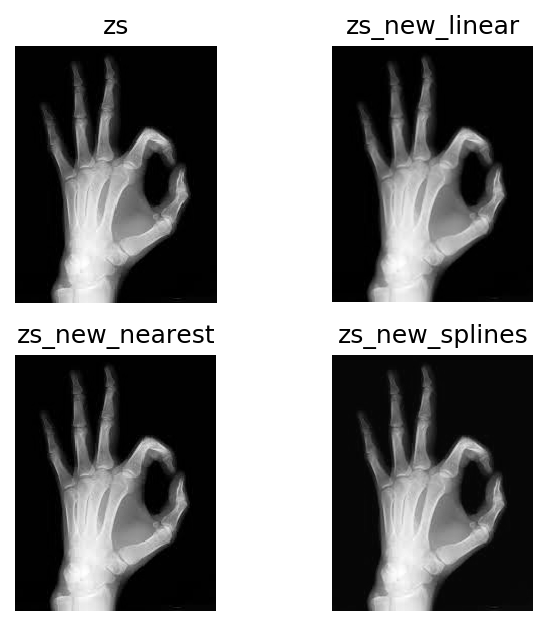

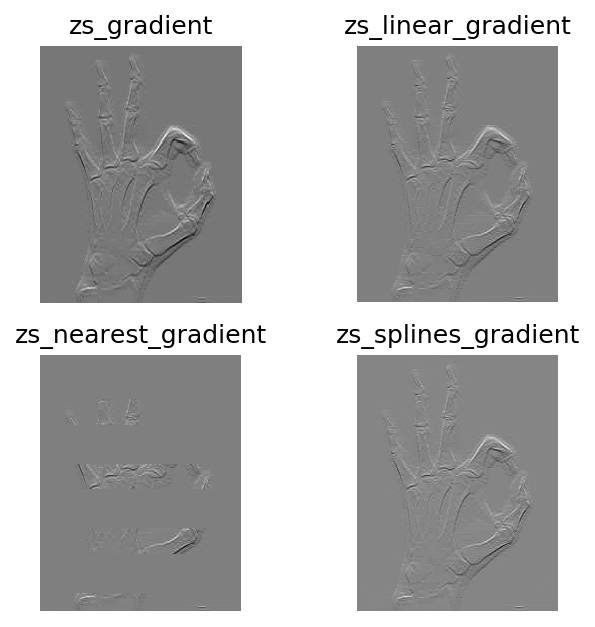

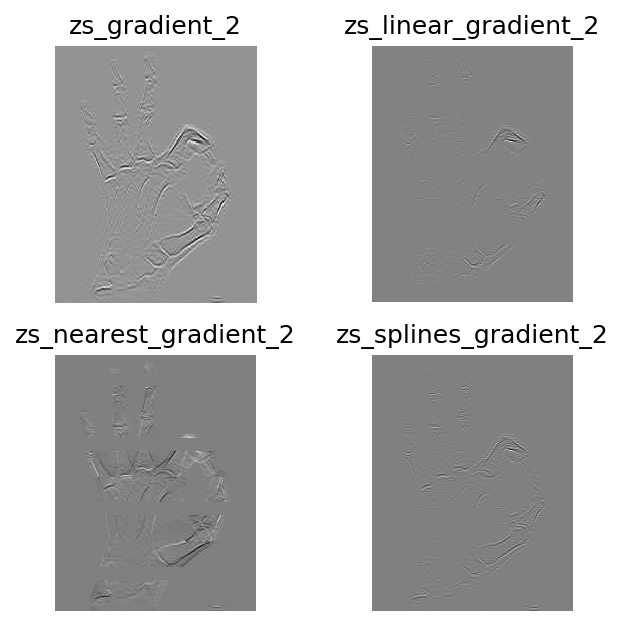

In [10]:
import skimage.io as io
import skimage.color as color

zs = color.rgb2gray(io.imread("example.jpeg")) #wczytanie zdjecia w skali szarości

y_size, x_size = zs.shape #zdefiniowanie zakresów tablic x i y
x, y = np.arange(x_size), np.arange(y_size) #wygenerowanie tablic o okreslonym zakresie
#x_new, y_new = np.arange(0.5, x_size + 0.5), np.arange(0.5, y_size + 0.5) 
x_new, y_new = np.arange(0, x_size, 0.2), np.arange(0, y_size, 0.2) #wygenerowanie nowych wartosci w nowym zakresie
xs_new, ys_new = np.meshgrid(x_new, y_new) #wygenerowanie siatki na osiach x_new i y_new


#interpolacja n wymiarowa róznymi metodami
zs_new_linear = interp.interpn((y, x), zs, (ys_new, xs_new), method='linear', bounds_error=False)  
zs_new_nearest = interp.interpn((y, x), zs, (ys_new, xs_new), method='nearest', bounds_error=False)
zs_new_splines = interp.interpn((y, x), zs, (ys_new, xs_new), method='splinef2d', bounds_error=False)

#obliczenie gradientu dla róznych interpolacji danych 
#[0] to gradient po y
zs_gradient = np.gradient(zs)[0]
zs_linear_gradient = np.gradient(zs_new_linear)[0]
zs_nearest_gradient = np.gradient(zs_new_nearest)[0]
zs_splines_gradient = np.gradient(zs_new_splines)[0]

#obliczenie drugiej pochodnej dla roznych interpolacji danych
zs_gradient_gradient = np.gradient(zs_gradient)[0]
zs_linear_gradient_gradient = np.gradient(zs_linear_gradient)[0]
zs_nearest_gradient_gradient = np.gradient(zs_nearest_gradient)[0]
zs_splines_gradient_gradient = np.gradient(zs_splines_gradient)[0]

rows = 2
cols = 2

plt.figure(dpi=150, figsize=(5, 5)) #przedstawienie wykresów interpolacji
plt.subplot(rows, cols, 1)
plt.imshow(zs, cmap='gray') #wykres obrazu
plt.title("zs")
plt.grid(False)
plt.axis('off')
plt.subplot(rows, cols, 2)
plt.imshow(zs_new_linear, cmap='gray') #wykres interpolacji liniowej
plt.title("zs_new_linear") 
plt.grid(False)
plt.axis('off')
plt.subplot(rows, cols, 3)
plt.imshow(zs_new_nearest, cmap='gray') #wykres interpolacji sasiada
plt.title("zs_new_nearest")
plt.grid(False)
plt.axis('off')
plt.subplot(rows, cols, 4)
plt.imshow(zs_new_splines, cmap='gray') #wykres interpolacji spline
plt.title("zs_new_splines")
plt.grid(False)
plt.axis('off')
plt.show()

plt.figure(dpi=150, figsize=(5, 5)) #przedstawienie wykresów gradientu interpolacji
plt.subplot(rows, cols, 1)
plt.imshow(zs_gradient, cmap='gray') #wykres gradientu 
plt.title("zs_gradient")
plt.grid(False)
plt.axis('off')
plt.subplot(rows, cols, 2)
plt.imshow(zs_linear_gradient, cmap='gray') #wykres gradientu interpolacji liniowej
plt.title("zs_linear_gradient")
plt.grid(False)
plt.axis('off')
plt.subplot(rows, cols, 3)
plt.imshow(zs_nearest_gradient, cmap='gray') #wykres gradientu interpolacji sasiada
plt.title("zs_nearest_gradient")
plt.grid(False)
plt.axis('off')
plt.subplot(rows, cols, 4)
plt.imshow(zs_splines_gradient, cmap='gray') #wykres gradientu interpolacji spline
plt.title("zs_splines_gradient")
plt.grid(False)
plt.axis('off')
plt.show()

plt.figure(dpi=150, figsize=(5, 5)) #przedstawienie wykresów 2 radientu interpolacji
plt.subplot(rows, cols, 1)
plt.imshow(zs_gradient_gradient, cmap='gray') #wykres 2 gradientu 
plt.title("zs_gradient_2")
plt.grid(False)
plt.axis('off')
plt.subplot(rows, cols, 2)
plt.imshow(zs_linear_gradient_gradient, cmap='gray') #wykres 2 gradientu interpolacji liniowej
plt.title("zs_linear_gradient_2")
plt.grid(False)
plt.axis('off')
plt.subplot(rows, cols, 3)
plt.imshow(zs_nearest_gradient_gradient, cmap='gray') #wykres 2 gradientu interpolacji sasiada
plt.title("zs_nearest_gradient_2")
plt.grid(False)
plt.axis('off')
plt.subplot(rows, cols, 4)
plt.imshow(zs_splines_gradient_gradient, cmap='gray') #wykres 2 gradientu interpolacji spline
plt.title("zs_splines_gradient_2")
plt.grid(False)
plt.axis('off')
plt.show()


#interpolacja ma bardzo duże znaczenie przy liczeniu pochodnej

zt_new_linear:
 [[ 2.    2.75  3.5   4.25  5.    5.75  6.5   7.25  8.  ]
 [ 2.75  3.5   4.25  5.    5.75  6.5   7.25  8.    8.75]
 [ 3.5   4.25  5.    5.75  6.5   7.25  8.    8.75  9.5 ]
 [ 4.25  5.    5.75  6.5   7.25  8.    8.75  9.5  10.25]
 [ 5.    5.75  6.5   7.25  8.    8.75  9.5  10.25 11.  ]
 [ 5.75  6.5   7.25  8.    8.75  9.5  10.25 11.   11.75]
 [ 6.5   7.25  8.    8.75  9.5  10.25 11.   11.75 12.5 ]
 [ 7.25  8.    8.75  9.5  10.25 11.   11.75 12.5  13.25]
 [ 8.    8.75  9.5  10.25 11.   11.75 12.5  13.25 14.  ]]
zt_new_our_linear: 
 [[ 2.    2.75  3.5   4.25  5.    5.75  6.5   7.25  8.  ]
 [ 2.75  3.5   4.25  5.    5.75  6.5   7.25  8.    8.75]
 [ 3.5   4.25  5.    5.75  6.5   7.25  8.    8.75  9.5 ]
 [ 4.25  5.    5.75  6.5   7.25  8.    8.75  9.5  10.25]
 [ 5.    5.75  6.5   7.25  8.    8.75  9.5  10.25 11.  ]
 [ 5.75  6.5   7.25  8.    8.75  9.5  10.25 11.   11.75]
 [ 6.5   7.25  8.    8.75  9.5  10.25 11.   11.75 12.5 ]
 [ 7.25  8.    8.75  9.5  10.25 11.   11.75 12.5  

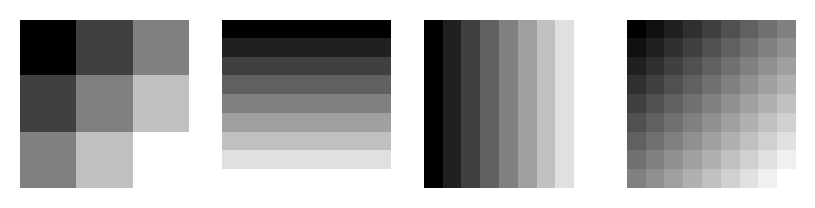

In [8]:
# ZADANIE 3
#Napisz funkcję do uporządkowanej interpolacji 2-D zawierającą dwa tryby: liniowy i najbliższego sąsiada.
#Nie używaj gotowych funkcji do interpolacji. Porównaj wyniki zaproponowanej funkcji z funkcjami wbudowanymi 
#zarówno w kontekście wyznaczanych wartości jak i czasu obliczeń.


x2 = np.linspace(1, 7, 3) #wygenerowanie zakresu zmiennej x
y2 = np.linspace(1, 7, 3) #wygenerowanie zakresu zmiennej y

xt, yt = np.meshgrid(x2, y2) #wygenerowanie siatki na osiach x i y

zt = xt + yt #definicja funkcji zt

x_new = np.linspace(1, 7, 9) #wygenerowanie nowego zakresu zmiennej x_new
y_new = np.linspace(1, 7, 9) #wygenerowanie nowego zakresu zmiennej y_new
 
xt_new, yt_new = np.meshgrid(x_new, y_new) #wygenerowanie nowej siatki na osiach x_new i y_new


def our_interpolate_2D(grid, values, points, mode): #zdefiniowanie funkcji do liczenia uporządkowanej interpolacji 2D
    
    xs, ys = grid #okreslenie siatek na osiach x i y
    xs_new, ys_new = points #okreslenie nowych siatek na osiach x i y
    
    divider = int(len(xs_new)/len(xs)) #obliczenie wartości zmiennej divider

    inter = np.zeros(xs_new.shape) #wygenerowanie tablicy zer bedącej nasza interpolacja
    a_y = np.zeros((len(xs_new),len(values)-1)) #tablica do przechowywania wartości interpolacji po osi x 

    if mode=="linear": #dla metody liniowej
        
        #na początek interpolujemy punkty na osi x, a nastepnie interpolujemy wartosci na osi y dla tych punktow
        
        for j in range(len(values)-1): #petle do liczenia wartości interpolacji po osi x
            for k in range(len(xs_new)):
                
                a_y[k,j] = ((xs_new[0,k]-xs[0,1])/(xs[0,0]-xs[0,1]))*values[0,j] + ((xs_new[0,k]-xs[0,0])/(xs[0,1]-xs[0,0]))*values[0,j+1]
  
        for i in range(len(xs_new)): #petla do liczenia interpolacji funkcji dwóch zmiennych
            for h in range(len(xs_new)):
                
                inter[i,h] = ((ys_new[i,h]-ys[1,1])/(ys[0,1]-xs[1,1]))*a_y[h,0] + ((ys_new[i,0]-ys[0,1])/(ys[1,1]-ys[0,1]))*a_y[h,1]

    if mode=="nearest": #dla metody sasiada
        print("nie wiem :(")
    
    return inter #zwrocenie wartosci interpolacji


zt_new_linear = interp.interpn((x2, y2), zt, (yt_new, xt_new), method='linear')
zt_new_our_linear = our_interpolate_2D(np.meshgrid(x2,y2), zt, np.meshgrid(x_new, y_new), "linear")
print("zt_new_linear:\n", zt_new_linear)
print("zt_new_our_linear: \n", zt_new_our_linear)


b_t = time.time()
zt_new_our_linear = our_interpolate_2D(np.meshgrid(x2,y2), zt, np.meshgrid(x_new, y_new), "linear")
e_t = time.time()
print("\nElapsed time our linear:", e_t - b_t)

b_t = time.time()
zt_new_linear = interp.interpn((x2, y2), zt, (yt_new, xt_new), method='linear')
e_t = time.time()
print("Elapsed time linear:", e_t - b_t)


rows = 2
cols = 4

plt.figure(dpi=200, figsize=(5, 5)) #przedstawienie wykresów 
plt.subplot(rows, cols, 1)
plt.imshow(zt, cmap='gray') #wykres funkcji zt dla zmiennych xt i yt
plt.grid(False)
plt.axis('off')
plt.subplot(rows, cols, 2)
plt.imshow(yt_new, cmap='gray') #wykres nowych zmiennych yt_new
plt.grid(False)
plt.axis('off')
plt.subplot(rows, cols, 3)
plt.imshow(xt_new, cmap='gray') #wykres nowych zmiennych xt_new
plt.grid(False)
plt.axis('off')
plt.subplot(rows, cols, 4)
plt.imshow(zt_new_linear, cmap='gray') #wykres interpolacji funkcji zt dla nowych zmiennych xt_new i yt_new
plt.grid(False)
plt.axis('off')
plt.show()




Całka metodą kwadratury: (8.666666666666668, 9.621932880084691e-14)
Elapsed time: 0.0010001659393310547 

Całka metodą trapezów: 8.675925925925927
Elapsed time: 0.0010006427764892578 

Całka metodą simpsona: 8.666666666666668
Elapsed time: 0.0 

Całka idealna 8.666666666666666 

Quad error:  1.7763568394002505e-15
Trap error:  0.009259259259261299
Simp error:  1.7763568394002505e-15


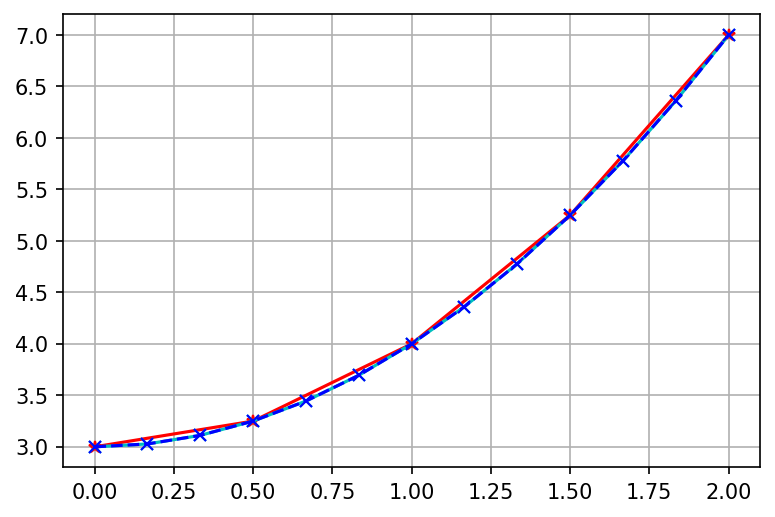

In [162]:
#ZADANIE 4
#Napisz funkcję, która będzie tworzyć funkcję interpolacyjną dla zadanej tablicy wejściowej (1-D), 
#np. za pomocą interpolacji kubicznej. Następnie wykorzystaj wyjściową funkcję interpolacyjną do całkowania 
#metodą kwadratury Gaussa korzystając z wbudowanej funkcji w SciPy. Porównaj wyniki do całkowania metodą trapezów/Simpsona.
#Jakie są zalety takiego podejścia? Jakie wady? Porównaj czas całkowania dla zaproponowanej metody oraz metody 
#trapezów/Simpsona. Porównaj dokładność całkowania dla funkcji o znanym wzorze.

start = 0
stop = 2
step = 0.5

x = np.arange(start, stop + step, step) #wygenerowanie zakresu zmiennej x
y = x**2 + 3 #definicja funkcji y
y_ideal = 26/3 #wartosc idealna calki funkcji y

divider = 3
x_dense = np.arange(start, stop + step/divider, step/divider) #wygenerowanie nowego zakresu zmiennej x_dense


def interpolate_func(): #funkcja do tworzenia funkcji interpolacyjnej dla tablicy y

    f = interp.interp1d(x, y, kind='cubic') #funkcja do interpolacji kubicznej
    
    return f #zwrócenie funkcji do interpolacji

b_t = time.time()
int_quad = integrate.quad(interpolate_func(), start, stop) #wykorzystanie funkcji do liczenia calki z kwadratury gaussa
e_t = time.time()
print("Całka metodą kwadratury:", int_quad)
print("Elapsed time:", e_t - b_t, "\n")

b_t = time.time()
int_trap = integrate.trapz(interpolate_func()(x_dense),x_dense) #calka metodą trapezów
e_t = time.time()
print("Całka metodą trapezów:", int_trap)
print("Elapsed time:", e_t - b_t, "\n")

b_t = time.time()
int_simp = integrate.simps(interpolate_func()(x_dense),x_dense) #calka metodą simpsona 1/3
e_t = time.time()
print("Całka metodą simpsona:", int_simp)
print("Elapsed time:", e_t - b_t, "\n")

print("Całka idealna", y_ideal, "\n")

print("Quad error: ", mse(y_ideal, float(int_quad[0]))) #bład kwadratury
print("Trap error: ", mse(y_ideal, int_trap)) #bład calki metoda trapezow
print("Simp error: ", mse(y_ideal, int_simp)) #bład metody simpsona

plt.figure(dpi=150) #przedstawienie wykresow
plt.plot(x, y, "r-*") #wykres funkcji y dla x
plt.plot(x_dense, x_dense**2 +3, "c-x") #wykres wartosci idealnych dla x_dense
plt.plot(x_dense, interpolate_func()(x_dense), "bx--" ) #wykres interpolacji kubicznej dla x_dense
plt.grid(True)
plt.show()

#najwiekszy bląd dla metody trapezów, ale najdluzej zajmuje meotda kwadratury

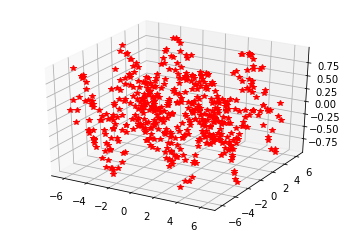

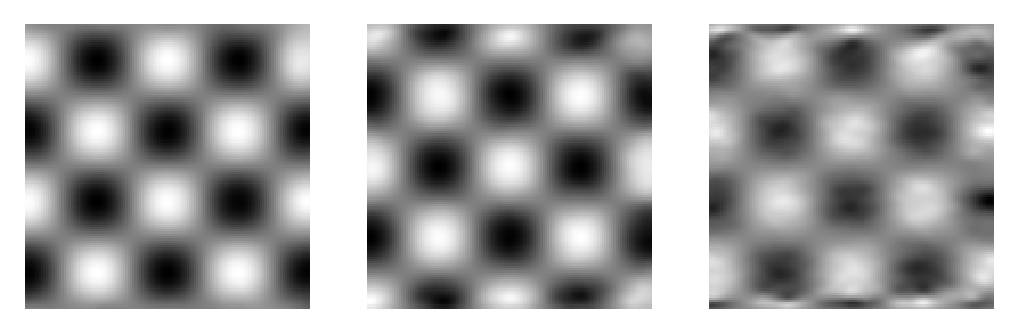

In [26]:
#interpolacja dla danych nieuprządkowanych (zdjecia mają w wiekszosci upoirządkowane dane wiec generujemy funkcje)

start = -2*np.pi
stop = 2*np.pi
samples = 500 #liczba próbek

x = (np.random.rand(samples) - 0.5)*(stop-start) #wygenerowanie zakresu zmiennej x (zakres symetryczny)
y = (np.random.rand(samples) - 0.5)*(stop-start) #wygenerowanie zakresu zmiennej y (zakres symetryczny)
z = np.cos(x)*np.sin(y) #zdefiniowanie funkcji dwoch zmiennych zs (wygenerowanie danych)

#naszych danych nie mozemy przedstawic na wykresie, nie wygenerujemy siatek, jest to problem takiej interpolacji
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure() #przedstawienie wykresu 3d zbioru danych (chumra)
ax = fig.add_subplot(111, projection='3d') 
plt.plot(x, y, z, "r*")
plt.show()

#interpolacja rbf się do tego sprawdza, interpolacja danych nierównomiernych

step_new = 0.1
samples_new = int((stop - start) / step_new) #wygenerowanie nowej liczby próbek
x_new = np.linspace(start, stop, samples_new) #wygenerowanie nowego zakresu x równomierny
y_new = np.linspace(start, stop, samples_new) #wygenerowanie nowego zakresu y równomierny
xs_new, ys_new = np.meshgrid(x_new, y_new) #wygenerowanie siatki na osiach x_new i y_new

rbf_interpolator = interp.Rbf(x, y, z) #funkcja do interpolacji
rbf = rbf_interpolator(xs_new, ys_new) #wynik interpolacji dla nowych zakresów
rbf_gradient = np.gradient(rbf)[0] #pochodna interpolacji rbf
rbf_gradient_gradient = np.gradient(rbf_gradient)[0] #2 pochodna interpolacji rbf

plt.figure(dpi=250, figsize=(5, 5)) #przedstawienie wykresów
plt.subplot(1, 3, 1)
plt.imshow(rbf, cmap='gray') #wykres interpolacji rbf danych xs_new ys_new
plt.grid(False)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(rbf_gradient, cmap='gray') #wykres pochodnej interpolacji rbf danych xs_new ys_new
plt.grid(False)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(rbf_gradient_gradient, cmap='gray') #wykres 2 pochodnej interpolacji rbf danych xs_new ys_new
plt.grid(False)
plt.axis('off')
plt.show()

#im większa liczba punktow początkowych tym lepsza interpolacja rbf
#Wykorzystanie  - móc interpolowac dane wielowymiarowe gdy dane wejsciowe nie sa uporządkowane
#Pierwsza pochodna nie jest dobra, druga nawet bardziej
#Dzieje sie tak bo rbf znacznie mniej dokladna niz liniowa czy kubiczna

Time for NumPy linear interpolation:  0.06056046485900879
Time for NumPy cubic interpolation:  0.1361234188079834
Time for PyTorch linear interpolation:  0.027024030685424805


(-0.5, 1023.5, 1023.5, -0.5)

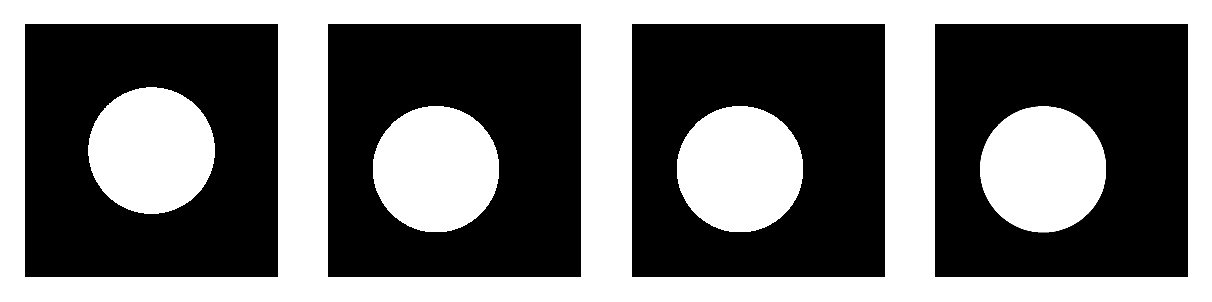

In [4]:
import torch
import torch.nn.functional as F
import scipy.ndimage as nd

device = "cpu"

y_size, x_size = 1024, 1024 #zdefiniowanie rozmiaru x i y
grid_x, grid_y = np.meshgrid(np.arange(x_size), np.arange(y_size)) #wygenerowanie siatek na osiach x i y
x0, y0, r = 512, 512, 256 #zdefiniowanie wartosci poczatkowych

image = ((grid_x - x0)**2 + (grid_y - y0)**2 < r**2).astype(np.float32) #obraz opisany rownaniem okregu (dane np.float32)
u_x, u_y = 75*np.ones(grid_x.shape), -75*np.ones(grid_y.shape) #wygenerowanie pol przemieszczeń
 
tensor = torch.from_numpy(image).view(1, 1, y_size, x_size).to(device) 
u_x_tensor, u_y_tensor = torch.from_numpy(grid_x + u_x), torch.from_numpy(grid_y + u_y) #wygenerownie tensorow 
grid = torch.zeros(1, y_size, x_size, 2)
grid[0, :, :, 0] = ((u_y_tensor / y_size) - 0.5)*2
grid[0, :, :, 1] = ((u_x_tensor / x_size) - 0.5)*2
grid = grid.to(device)

#uporzadkowana interpolacja jednowymiarowa z jednorodnymi odstepami miedzy punktami (domyslenie interpolacja splinowa)

b_t = time.time()
warped_image_linear = nd.map_coordinates(image, [grid_y + u_y, grid_x + u_x], order=1)
e_t = time.time()
print("Time for NumPy linear interpolation: ", e_t-b_t)

b_t = time.time()
warped_image_cubic = nd.map_coordinates(image, [grid_y + u_y, grid_x + u_x], order=3)
e_t = time.time()
print("Time for NumPy cubic interpolation: ", e_t-b_t)

b_t = time.time()
warped_tensor = F.grid_sample(tensor, grid)
e_t = time.time()
print("Time for PyTorch linear interpolation: ", e_t-b_t)


rows = 1
cols = 4

plt.figure(dpi=250)
plt.subplot(rows, cols, 1)
plt.imshow(image, cmap='gray') #
plt.grid(False)
plt.axis('off')
plt.subplot(rows, cols, 2)
plt.imshow(warped_image_linear, cmap='gray')
plt.grid(False)
plt.axis('off')
plt.subplot(rows, cols, 3)
plt.imshow(warped_image_cubic, cmap='gray')
plt.grid(False)
plt.axis('off')
plt.subplot(rows, cols, 4)
plt.imshow(warped_tensor.cpu()[0, 0, :, :], cmap='gray')
plt.grid(False)
plt.axis('off')

#PyTorch znacznie szybszy

In [20]:
0.04356789588928223 / 0.0002803802490234375

155.38860544217687